# Loading and Exploring Log LAS Files With Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio as ls

In [2]:
las =  ls.read('Data/15-9-19_SR_COMP.LAS')

In [3]:
print(las.curves)

Mnemonic  Unit  Value         Description                       
--------  ----  -----         -----------                       
DEPT      M     00 001 00 00  1  DEPTH                          
AC        US/F                2  Sonic Transit Time (Slowness)  
CALI      IN                  3  Caliper                        
DEN       G/CC                4  Bulk Density                   
GR        GAPI                5  Gamma Ray                      
NEU       %                   6  Neutron Porosity               
RDEP      OHMM                7  Deep Resistivity               
RMED      OHMM                8  Medium Resistivity             


In [5]:
las.data.shape

(6701, 8)

In [6]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [13]:
las.sections['Well']

[HeaderItem(mnemonic="STRT", unit="M", value="102.1568", descr="Top Depth"),
 HeaderItem(mnemonic="STOP", unit="M", value="4636.514", descr="Bottom Depth"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.1524", descr="Depth Increment"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Null Value"),
 HeaderItem(mnemonic="FLD", unit="", value="Q15", descr="Field Name"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-19", descr="NAME"),
 HeaderItem(mnemonic="WBN", unit="", value="15/9-19 SR", descr="WELLBORE"),
 HeaderItem(mnemonic="NATI", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="CTRY", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="COMP", unit="", value="STATOIL", descr="OPERATOR"),
 HeaderItem(mnemonic="PDAT", unit="", value="MSL", descr="PERM DATUM"),
 HeaderItem(mnemonic="COUN", unit="", value="NORTH SEA", descr="RIG NAME"),
 HeaderItem(mnemonic="STAT", unit="", value="NORWAY", descr="STATE"),
 HeaderItem(mnemonic="PBWE", unit="", v

In [46]:
for item in las.sections['Well']:
    print (f"{item.descr} ({item.mnemonic}): \t\t {item.value} {item.unit}")

Top Depth (STRT): 		 102.1568 M
Bottom Depth (STOP): 		 4636.514 M
Depth Increment (STEP): 		 0.1524 M
Null Value (NULL): 		 -999.25 
Field Name (FLD): 		 Q15 
NAME (WELL): 		 15/9-19 
WELLBORE (WBN): 		 15/9-19 SR 
COUNTRY (NATI): 		 NOR 
COUNTRY (CTRY): 		 Norway 
OPERATOR (COMP): 		 STATOIL 
PERM DATUM (PDAT): 		 MSL 
RIG NAME (COUN): 		 NORTH SEA 
STATE (STAT): 		 NORWAY 
PB WELL ID (PBWE): 		 15/9-19 
PB WELLBORE ID (APIN): 		 15/9-19 SR 
PB WELL NAME SET (PBWS): 		 ALL 


In [44]:
las.sections['Well']['CTRY'] = 'Norway'

In [45]:
las.sections['Well']['CTRY']

HeaderItem(mnemonic="CTRY", unit="", value="Norway", descr="COUNTRY")

In [52]:
#Las.well.mnemonic.value
las.well.COMP.value

'STATOIL'

In [54]:
for curves in las.curves:
    print(curves.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [64]:
for count, curve in enumerate(las.curves):
    print(f'Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}')
print(f'Hay un total de: {count+1} curvas presentes en el archivo')

Curve: DEPT, 	 Units: M, 	 Description: 1  DEPTH
Curve: AC, 	 Units: US/F, 	 Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, 	 Units: IN, 	 Description: 3  Caliper
Curve: DEN, 	 Units: G/CC, 	 Description: 4  Bulk Density
Curve: GR, 	 Units: GAPI, 	 Description: 5  Gamma Ray
Curve: NEU, 	 Units: %, 	 Description: 6  Neutron Porosity
Curve: RDEP, 	 Units: OHMM, 	 Description: 7  Deep Resistivity
Curve: RMED, 	 Units: OHMM, 	 Description: 8  Medium Resistivity
Hay un total de: 8 curvas presentes en el archivo


In [65]:
las.delete_curve('RMED')

In [66]:
for count, curve in enumerate(las.curves):
    print(f'Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}')
print(f'Hay un total de: {count+1} curvas presentes en el archivo')

Curve: DEPT, 	 Units: M, 	 Description: 1  DEPTH
Curve: AC, 	 Units: US/F, 	 Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, 	 Units: IN, 	 Description: 3  Caliper
Curve: DEN, 	 Units: G/CC, 	 Description: 4  Bulk Density
Curve: GR, 	 Units: GAPI, 	 Description: 5  Gamma Ray
Curve: NEU, 	 Units: %, 	 Description: 6  Neutron Porosity
Curve: RDEP, 	 Units: OHMM, 	 Description: 7  Deep Resistivity
Hay un total de: 7 curvas presentes en el archivo


In [67]:
las.write('exports/15_9-19_Exported.las')

# Converting LAS File to a Pandas Dataframe

In [68]:
well = las.df()

In [69]:
well.head()

,AC,CALI,DEN,GR,NEU,RDEP
DEPT,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442


In [70]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 3615.434 to 4636.514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      6579 non-null   float64
 1   CALI    6579 non-null   float64
 2   DEN     6656 non-null   float64
 3   GR      6689 non-null   float64
 4   NEU     6668 non-null   float64
 5   RDEP    6701 non-null   float64
dtypes: float64(6)
memory usage: 366.5 KB


In [71]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100


# Quick Plot

<Axes: xlabel='DEPT'>

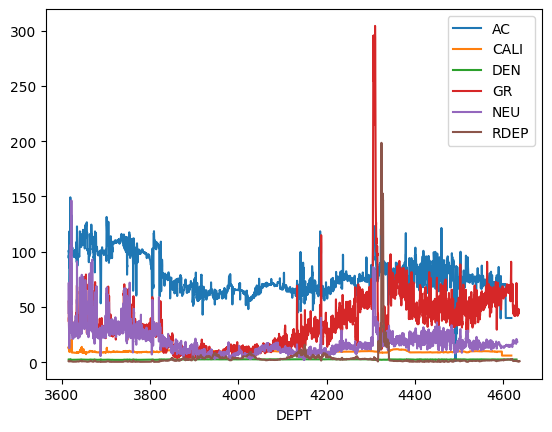

In [72]:
well.plot()

<Axes: xlabel='DEPT'>

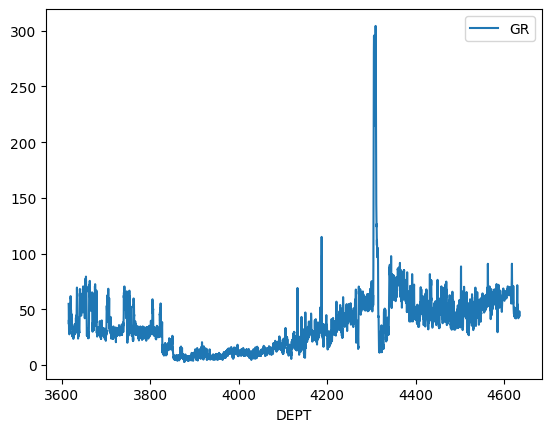

In [73]:
well.plot(y='GR')

<Axes: xlabel='DEPT'>

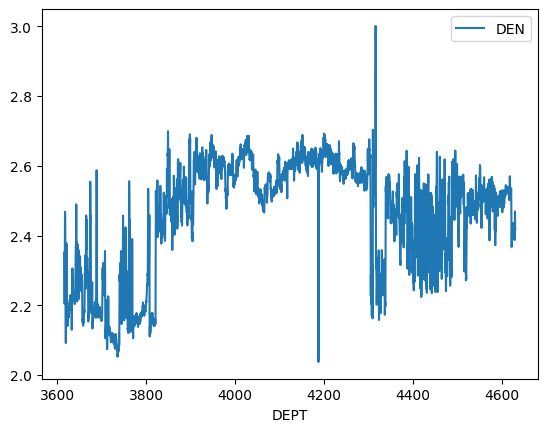

In [74]:
well.plot(y='DEN')